<a href="https://colab.research.google.com/github/emms204/Turtle-Rescue-Forecast-Challenge/blob/main/Turtle_Rescue_Forecast_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt
from sklearn.metrics import mean_squared_error, mean_squared_log_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt



In [ ]:
capture = pd.read_csv('/content/CaptureSite_category.csv')
sub = pd.read_csv('/content/Sample_sub.csv')
train = pd.read_csv('/content/train_turtle_rescue.csv', parse_dates=['Date_TimeCaught'])
var_def = pd.read_csv('/content/variable_definitions.csv',sep=";", encoding='cp1252')

In [ ]:
capture

,CaptureSite,CaptureSiteCategory,Type
0,CaptureSite_0,CaptureSiteCategory_2,Type_1
1,CaptureSite_1,CaptureSiteCategory_2,Type_1
2,CaptureSite_10,CaptureSiteCategory_2,Type_1
3,CaptureSite_11,CaptureSiteCategory_0,Type_0
4,CaptureSite_12,CaptureSiteCategory_2,Type_1
5,CaptureSite_13,CaptureSiteCategory_2,Type_1
6,CaptureSite_14,CaptureSiteCategory_4,Type_0
7,CaptureSite_15,CaptureSiteCategory_0,Type_0
8,CaptureSite_16,CaptureSiteCategory_4,Type_0
9,CaptureSite_17,CaptureSiteCategory_4,Type_0


In [ ]:
sub

,ID,Capture_Number
0,CaptureSite_0_201901,7
1,CaptureSite_0_201902,1
2,CaptureSite_0_201903,5
3,CaptureSite_0_201904,2
4,CaptureSite_0_201905,3
...,...,...
1271,CaptureSite_9_201940,0
1272,CaptureSite_9_201941,7
1273,CaptureSite_9_201942,7
1274,CaptureSite_9_201943,3


There are 29 capture sites 

In [ ]:
pd.set_option('display.max_colwidth', 200) 
var_def

,"Variables,""Description"""
0,"Rescue_ID,""It’s an individual bycatch incidence identity number. The numbers are consecutive, for each year e.g. 2018_RE_0732 means rescue number 732 in year 2018"""
1,"Date_TimeCaught,""Date the turtle is captured e.g. 06/01/2018 """
2,"Researcher,""Name of bycatch officer(s) involved with specific rescue"""
3,"Capture Site,""Area where turtle was captured, as reported by the fisher."""
4,"Foraging Ground,""General area of ocean area where turtle was captured. The assumption is that the turtle was foraging where it was captured. The foraging area is broadly classified either as the o..."
5,"Capture Method,""Fishing gear or method used by fishers to capture the turtle"""
6,"Fisher,""Name of the fisher who captured the turtle"""
7,"Landing_Site,""Section of beach where turtle is landed."""
8,"Species,""Species of turtle (e.g. green turtle, hawksbill, loggerhead etc.)"""
9,"Tag_1,""Individual / unique number used to identify a turtle. Each turtle that is captured is tagged. Formats of tag numbers have been changed over years, although turtles retain their old tags eve..."


In [ ]:
train

,Rescue_ID,Date_TimeCaught,Researcher,CaptureSite,ForagingGround,CaptureMethod,Fisher,LandingSite,Species,Tag_1,...,Lost_Tags,T_Number,CCL_cm,CCW_cm,Weight_Kg,Sex,TurtleCharacteristics,Status,ReleaseSite,Date_TimeRelease
0,2000_RE_0060,2000-12-22,Researcher_25,CaptureSite_0,Ocean,Net,Fisher_1072,LandingSite_CaptureSiteCategory_2,Species_6,CC00147,...,NaN,NaN,64.70,62.60,NaN,Unknown,algae at rear of shell,Released,ReleaseSite_50,22/12/00
1,2001_RE_0187,2001-10-28,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_520,LandingSite_CaptureSiteCategory_2,Species_6,W442,...,NaN,NaN,35.85,31.35,NaN,Unknown,multiple b's on front flippers& a lot of algae growth on shall - mostly towards rear,Released,ReleaseSite_62,28/10/01
2,2001_RE_0197,2001-11-01,Researcher_6,CaptureSite_0,Ocean,Net,Fisher_1669,LandingSite_CaptureSiteCategory_2,Species_5,KE0376,...,NaN,NaN,51.80,49.20,NaN,Unknown,clean,Released,ReleaseSite_50,01/11/01
3,2002_RE_0031,2002-03-11,Researcher_32,CaptureSite_0,Ocean,Net,Fisher_1798,LandingSite_CaptureSiteCategory_2,Species_6,CC00302,...,NaN,NaN,60.50,59.00,NaN,Unknown,1 b 3 CS+ calcerous algae at rear end of shell+ 9/10+ 10/11 RM has chips+ 9/10 LM has chip+ Left supracaudal is broken a bit at the end+ RF flipper is 1/2 missing and LF flipper the end is mising+...,Released,ReleaseSite_50,11/03/02
4,2002_RE_0118,2002-08-08,Researcher_25,CaptureSite_0,Ocean,Beached,Fisher_1918,LandingSite_CaptureSiteCategory_2,Species_5,NotTagged_0113,...,NaN,NaN,34.70,33.00,NaN,Unknown,very lively+ right eye is hanging out + swollen+ left eye is closed + bleeding-possible from a speargun or infection or virus+ hump in 2 LLS + 2/3 CS,Released,ReleaseSite_62,08/08/02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18057,2018_RE_1511,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_569,LandingSite_CaptureSiteCategory_1,Species_5,KES1828,...,NaN,NaN,57.13,50.57,21.09,Unknown,White calcareous algae on carapace,Released,ReleaseSite_68,18/12/18
18058,2018_RE_1514,2018-12-18,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_125,LandingSite_CaptureSiteCategory_1,Species_6,KES0563,...,KES0416,NaN,42.07,38.37,9.02,Unknown,Calcareous + green algae on carapace\nBarnacles on shoulders,Released,ReleaseSite_68,18/12/18
18059,2018_RE_1532,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1343,LandingSite_CaptureSiteCategory_1,Species_5,KES1833,...,NaN,NaN,57.20,52.30,NaN,Unknown,Clean turtle,Released,ReleaseSite_68,24/12/18
18060,2018_RE_1533,2018-12-24,Researcher_30,CaptureSite_9,Ocean,Net,Fisher_1551,LandingSite_CaptureSiteCategory_1,Species_5,KES1831,...,NaN,NaN,51.90,48.50,NaN,Unknown,Green algae on carapace\ntip of left supra missing,Released,ReleaseSite_68,24/12/18


In [ ]:
X = train[['Date_TimeCaught','CaptureSite']].copy()
import datetime
X['year'] = X['Date_TimeCaught'].dt.year
X['week'] = X['Date_TimeCaught'].dt.isocalendar().week.astype("int64")
X['day'] = X['Date_TimeCaught'].dt.day
X['month'] = X['Date_TimeCaught'].dt.month
#X['year_week'] = X.apply(lambda x: str(x.year)+'/'+str(x.month), axis=1)
#X['year_week'] = X.apply(lambda x: datetime.datetime.strptime(x.year_week, '%Y/%M'),axis=1)
X['year_week'] = X.apply(lambda x: datetime.datetime.strftime(x.Date_TimeCaught, '%Y-%W'),axis=1)
#X(x, '%Y-%m-%d').strftime('%Y-%W')
#datetime.datetime.combine(X['year'],X['week'])
X

,Date_TimeCaught,CaptureSite,year,week,day,month,year_week
0,2000-12-22,CaptureSite_0,2000,51,22,12,2000-51
1,2001-10-28,CaptureSite_0,2001,43,28,10,2001-43
2,2001-11-01,CaptureSite_0,2001,44,1,11,2001-44
3,2002-03-11,CaptureSite_0,2002,11,11,3,2002-10
4,2002-08-08,CaptureSite_0,2002,32,8,8,2002-31
...,...,...,...,...,...,...,...
18057,2018-12-18,CaptureSite_9,2018,51,18,12,2018-51
18058,2018-12-18,CaptureSite_9,2018,51,18,12,2018-51
18059,2018-12-24,CaptureSite_9,2018,52,24,12,2018-52
18060,2018-12-24,CaptureSite_9,2018,52,24,12,2018-52


In [ ]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    """
    Visualizes time series data

    Args:
      time (array of int) - contains the time steps
      series (array of int) - contains the measurements for each time step
      format (string) - line style when plotting the graph
      start (int) - first time step to plot
      end (int) - last time step to plot
      label (list of strings)- tag for the line
    """

    # Setup dimensions of the graph figure
    plt.figure(figsize=(15, 10))

    # Plot the time series data
    plt.plot(time[start:end], series[start:end], format)

    # Label the x-axis
    plt.xlabel("Time")

    # Label the y-axis
    plt.ylabel("Value")

    if label:
      plt.legend(fontsize=14, labels=label)

    # Overlay a grid on the graph
    plt.grid(True)

    # Draw the graph on screen
    plt.show()

In [ ]:
tar= X.year_week.groupby(X.year_week).count()

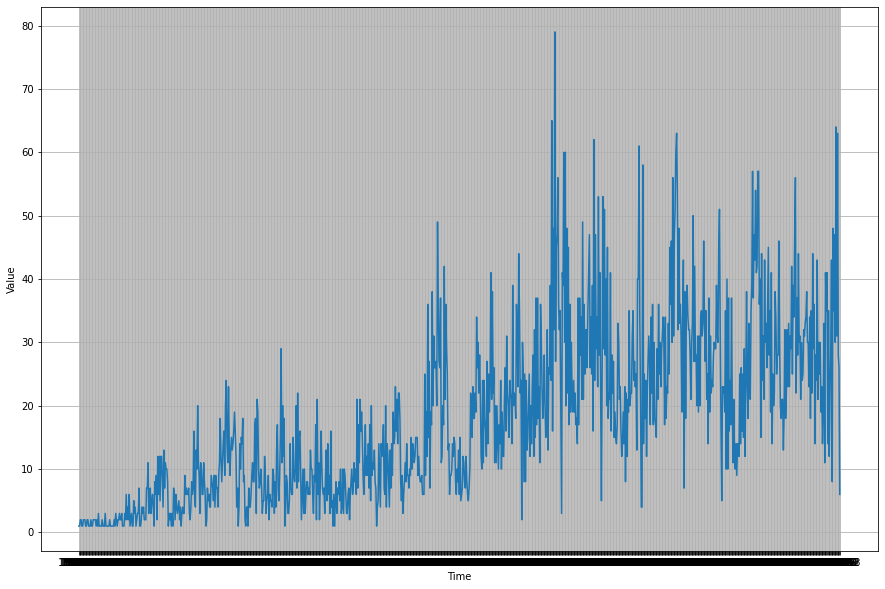

In [ ]:
plot_series(tar.index, tar.values)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18062 entries, 0 to 18061
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rescue_ID              18062 non-null  object        
 1   Date_TimeCaught        18062 non-null  datetime64[ns]
 2   Researcher             18062 non-null  object        
 3   CaptureSite            18062 non-null  object        
 4   ForagingGround         18062 non-null  object        
 5   CaptureMethod          18062 non-null  object        
 6   Fisher                 18062 non-null  object        
 7   LandingSite            18062 non-null  object        
 8   Species                18062 non-null  object        
 9   Tag_1                  18062 non-null  object        
 10  Tag_2                  18062 non-null  object        
 11  Lost_Tags              925 non-null    object        
 12  T_Number               38 non-null     object        
 13  C

In [ ]:
train.isna().sum()

Rescue_ID                    0
Date_TimeCaught              0
Researcher                   0
CaptureSite                  0
ForagingGround               0
CaptureMethod                0
Fisher                       0
LandingSite                  0
Species                      0
Tag_1                        0
Tag_2                        0
Lost_Tags                17137
T_Number                 18024
CCL_cm                      24
CCW_cm                      27
Weight_Kg                 5409
Sex                       4330
TurtleCharacteristics       41
Status                    3633
ReleaseSite                 75
Date_TimeRelease          6108
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
nan_features = ['Lost_Tags','T_Number','Sex','TurtleCharacteristics','Status','ReleaseSite','Date_TimeRelease']
for feat in nan_features:
  train[feat].fillna('unknown',inplace=True)

In [ ]:
train[['CCL_cm','CCW_cm','Weight_Kg']].describe()
nan_features = ['CCL_cm','CCW_cm','Weight_Kg']
for feat in nan_features:
  train[feat].fillna(train[feat].mean(),inplace=True)

In [ ]:
train.isna().sum()

Rescue_ID                0
Date_TimeCaught          0
Researcher               0
CaptureSite              0
ForagingGround           0
CaptureMethod            0
Fisher                   0
LandingSite              0
Species                  0
Tag_1                    0
Tag_2                    0
Lost_Tags                0
T_Number                 0
CCL_cm                   0
CCW_cm                   0
Weight_Kg                0
Sex                      0
TurtleCharacteristics    0
Status                   0
ReleaseSite              0
Date_TimeRelease         0
dtype: int64

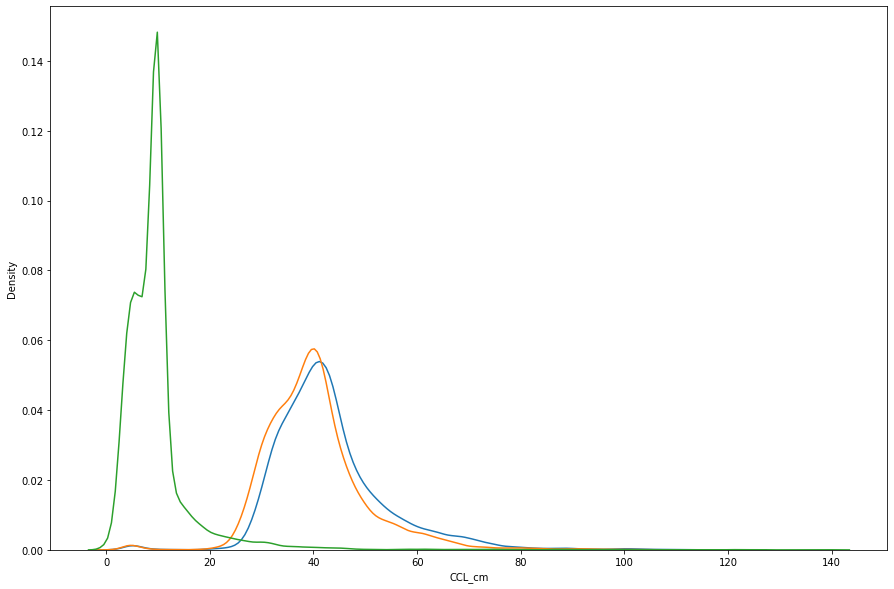

In [ ]:
plt.figure(figsize=(15,10))
num_cols = train.select_dtypes(include=['float64']).columns
for col in num_cols:
  sns.kdeplot(train[col])

In [ ]:
X = train[['Date_TimeCaught','CaptureSite']].copy()
X.index = pd.to_datetime(X['Date_TimeCaught'])
X.drop(['Date_TimeCaught'],inplace=True,axis=1)
X

,CaptureSite
Date_TimeCaught,
2000-12-22,CaptureSite_0
2001-10-28,CaptureSite_0
2001-11-01,CaptureSite_0
2002-03-11,CaptureSite_0
2002-08-08,CaptureSite_0
...,...
2018-12-18,CaptureSite_9
2018-12-18,CaptureSite_9
2018-12-24,CaptureSite_9


In [ ]:
#X['Seconds'] = X.index.map(pd.Timestamp.timestamp)
X['Day_Week'] = X.index.day_of_week
X['Day_Year'] = X.index.day_of_year
X['Day_Month'] = X.index.days_in_month
X['Week'] = X.index.week
X['Quarter'] = X.index.quarter
X['Month'] = X.index.month
X['Year'] = X.index.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



In [ ]:
day = 60*60*24
year = 365.2425*day

X['Day sin'] = np.sin(X['Seconds'] * (2* np.pi / day))
X['Year sin'] = np.sin(X['Seconds'] * (2 * np.pi / year))
X['Year cos'] = np.cos(X['Seconds'] * (2 * np.pi / year))


In [ ]:
X = X.drop('Seconds',axis=1)

KeyError: ignored

In [ ]:
X = X.drop('CaptureSite',axis=1)

In [ ]:
X['Year_week'] = X.apply(lambda x:str(x.Year) + '_' + str(x.Week),axis=1)
X.head()

,Day_Week,Day_Year,Day_Month,Week,Quarter,Month,Year,Year_week
Date_TimeCaught,,,,,,,,
2000-12-22,4,357,31,51,4,12,2000,2000_51
2001-10-28,6,301,31,43,4,10,2001,2001_43
2001-11-01,3,305,30,44,4,11,2001,2001_44
2002-03-11,0,70,31,11,1,3,2002,2002_11
2002-08-08,3,220,31,32,3,8,2002,2002_32


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
num_cols = X.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
  X[col] = scale.fit_transform(X[[col]])

In [ ]:
X['count'] = X.Year_week.groupby(X.Year_week).transform('count')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Year_week'] = le.fit_transform(X['Year_week'])

In [ ]:
X

,Day_Week,Day_Year,Day_Month,Week,Quarter,Month,Year,Year_week,count
Date_TimeCaught,,,,,,,,,
2000-12-22,0.666667,0.975342,1.000000,0.961538,1.000000,1.000000,0.10,64,6
2001-10-28,1.000000,0.821918,1.000000,0.807692,1.000000,0.818182,0.15,105,12
2001-11-01,0.500000,0.832877,0.666667,0.826923,1.000000,0.909091,0.15,106,12
2002-03-11,0.000000,0.189041,1.000000,0.192308,0.000000,0.181818,0.20,121,6
2002-08-08,0.500000,0.600000,1.000000,0.596154,0.666667,0.636364,0.20,142,2
...,...,...,...,...,...,...,...,...,...
2018-12-18,0.166667,0.961644,1.000000,0.961538,1.000000,1.000000,1.00,997,28
2018-12-18,0.166667,0.961644,1.000000,0.961538,1.000000,1.000000,1.00,997,28
2018-12-24,0.000000,0.978082,1.000000,0.980769,1.000000,1.000000,1.00,998,26


In [ ]:
def df_to_X_y(df, window_size=10):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size][8]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
X2, y2 = df_to_X_y(X)
X2.shape, y2.shape

((18052, 10, 9), (18052,))

In [ ]:
X2_train, y2_train = X2[:16000], y2[:16000]
X2_val, y2_val = X2[16000:17000], y2[16000:17000]
X2_test, y2_test = X2[17000:], y2[17000:]
X2_train.shape, y2_train.shape, X2_val.shape, y2_val.shape, X2_test.shape, y2_test.shape

((16000, 10, 9), (16000,), (1000, 10, 9), (1000,), (1052, 10, 9), (1052,))

In [ ]:
model = Sequential()
model.add(InputLayer((10, 9)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                18944     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 19,473
Trainable params: 19,473
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#cp4 = ModelCheckpoint('model', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X2_train, y2_train, validation_data=(X2_val, y2_val), epochs=100)

Epoch 1/100
500/500 [==============================] - 5s 6ms/step - loss: 829.6491 - root_mean_squared_error: 28.8036 - val_loss: 848.2549 - val_root_mean_squared_error: 29.1248
Epoch 2/100
500/500 [==============================] - 3s 5ms/step - loss: 606.8821 - root_mean_squared_error: 24.6350 - val_loss: 650.6193 - val_root_mean_squared_error: 25.5072
Epoch 3/100
500/500 [==============================] - 3s 5ms/step - loss: 467.8167 - root_mean_squared_error: 21.6291 - val_loss: 503.8773 - val_root_mean_squared_error: 22.4472
Epoch 4/100
500/500 [==============================] - 3s 5ms/step - loss: 357.8455 - root_mean_squared_error: 18.9168 - val_loss: 376.3362 - val_root_mean_squared_error: 19.3994
Epoch 5/100
500/500 [==============================] - 3s 5ms/step - loss: 264.7184 - root_mean_squared_error: 16.2702 - val_loss: 279.0831 - val_root_mean_squared_error: 16.7058
Epoch 6/100
500/500 [==============================] - 3s 7ms/step - loss: 198.6227 - root_mean_squared_e

In [ ]:
def windowed_dataset(dataset, window_size,batch_size,shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(dataset)
  dataset = dataset.window(window_size+1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window:window.batch(window_size+1))
  dataset = dataset.map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.shuffle(shuffle_buffer)
  dataset = dataset.batch(batch_size).prefetch(1)

  return dataset